In [54]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [55]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n * 0.1)

series = [gauss(0, 1), gauss(0, 1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(
        omega
        + alpha_1 * series[-1] ** 2
        + alpha_2 * series[-2] ** 2
        + beta_1 * vols[-1] ** 2
        + beta_2 * vols[-2] ** 2
    )
    new_val = gauss(0, 1) * new_vol

    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

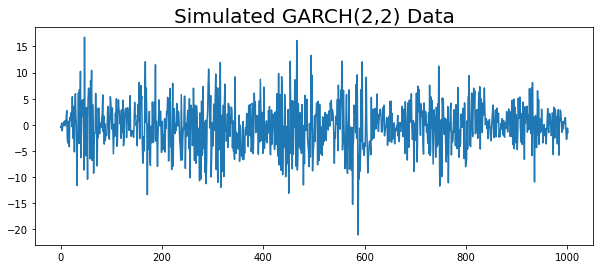

In [56]:
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.title("Simulated GARCH(2,2) Data", fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

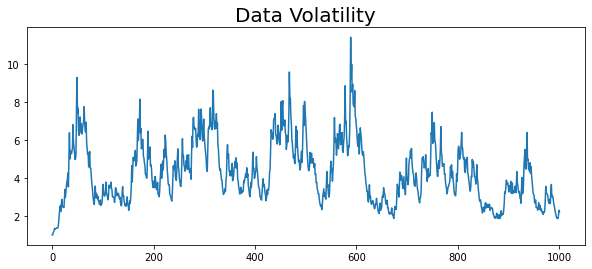

In [57]:
plt.figure(figsize=(10, 4))
plt.plot(vols)
plt.title("Data Volatility", fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

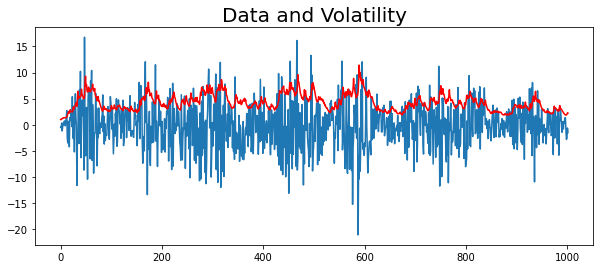

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.plot(vols, color="red")
plt.title("Data and Volatility", fontsize=20)

# PACF Plot

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


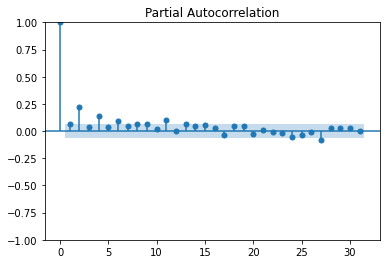

In [59]:
plot_pacf(np.array(series) ** 2)
plt.show()

# Fit the GARCH Model

In [60]:
train, test = series[:-test_size], series[-test_size:]

In [61]:
model = arch_model(train, p=2, q=2)

In [62]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3833.308890327503
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2931.5800296211796
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2653.352407715819
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2580.038523988784
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2603.6345043843276
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2588.786583418497
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2580.149237755608
Iteration:      8,   Func. Count:     66,   Neg. LLF: 2561.038289644006
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2560.6273256557643
Iteration:     10,   Func. Count:     82,   Neg. LLF: 2560.058962609055
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2560.0479288017705
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2560.0478251377367
Iteration:     13,   Func. Count:    103,   Neg. LLF: 2560.047823995703
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2560.

In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2560.05
Distribution:                  Normal   AIC:                           5132.10
Method:            Maximum Likelihood   BIC:                           5160.92
                                        No. Observations:                  902
Date:                Fri, Oct 28 2022   Df Residuals:                      901
Time:                        01:11:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1552      0.117     -1.328      0.184 [ -0.384,7.385e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8636      0.347      2.487  1.290e-02    [  0.183,  1.544]
alpha[1]       0.0410  3.727e-02      1.099      0.272 [-3.208e-02,  0.114]
alpha[2]       0.2563  5.825e-02      4.400  1.084e-05    [  0.142,  0.370]
beta[1]        0.2393      0.120      1.999  4.563e-02  [4.654e-03,  0.474]
beta[2]        0.4415      0.103      4.285  1.829e-05    [  0.240,  0.643]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [64]:
predictions = model_fit.forecast(horizon=test_size)

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


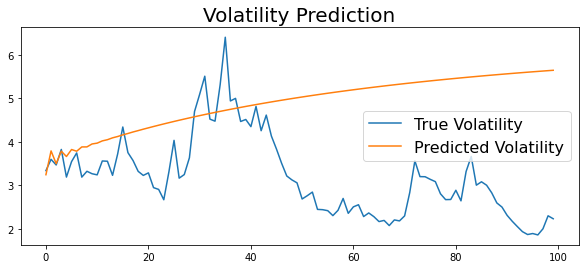

In [65]:
plt.figure(figsize=(10, 4))
(true,) = plt.plot(vols[-test_size:])
(preds,) = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title("Volatility Prediction", fontsize=20)
plt.legend(["True Volatility", "Predicted Volatility"], fontsize=16)

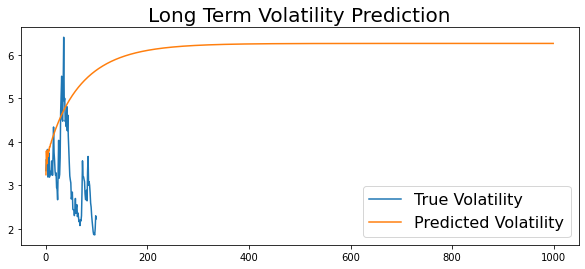

In [66]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10, 4))
(true,) = plt.plot(vols[-test_size:])
(preds,) = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title("Long Term Volatility Prediction", fontsize=20)
plt.legend(["True Volatility", "Predicted Volatility"], fontsize=16)

# Rolling Forecast Origin

In [67]:
rolling_predictions = []
for i in range(test_size):
    train = series[: -(test_size - i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this 

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this 

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this 

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this 

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


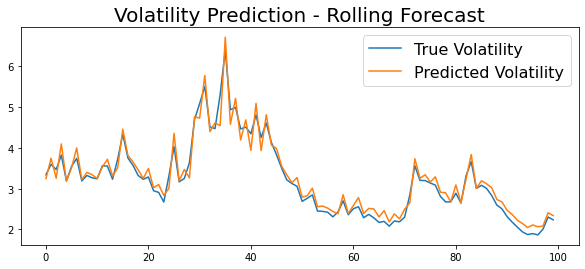

In [68]:
plt.figure(figsize=(10, 4))
(true,) = plt.plot(vols[-test_size:])
(preds,) = plt.plot(rolling_predictions)
plt.title("Volatility Prediction - Rolling Forecast", fontsize=20)
plt.legend(["True Volatility", "Predicted Volatility"], fontsize=16)